<a href="https://colab.research.google.com/github/mchhour31/NN_work/blob/main/linear_regression_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
tf.__version__

'2.9.2'

In [40]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv


--2022-12-04 08:36:11--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-12-04 08:36:11 (15.2 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [41]:
df = pd.read_csv("moore.csv", header=None).values
X = df[:, 0]
y = df[:, -1]

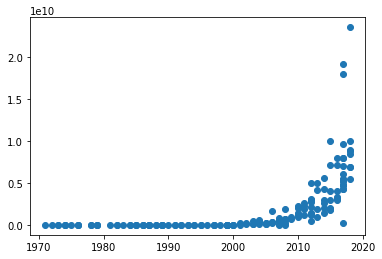

In [42]:
plt.scatter(X, y)

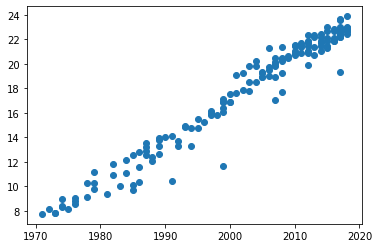

In [43]:
# datapoints are exponential, so need to log them

y = np.log(y)
plt.scatter(X, y)

In [44]:
# feature scaling, centering the data around 0
# can also use standardscaler, except that transformation needs to be reveresed later on
X = X - X.mean()

In [45]:
# neural net model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), loss='mse')

# learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# fit the model
r = model.fit(X, y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 3ms/step - loss: 647.6614 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 715.5496 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 5ms/step - loss: 370.6853 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 273.8917 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 326.2262 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 295.4000 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 173.4634 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 103.7723 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 50.1471 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 49.6795 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 13ms/step - loss

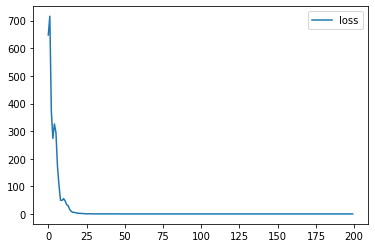

In [46]:
plt.plot(r.history['loss'], label='loss')
plt.legend()

In [47]:
# get the slope of line
# slope of line is related to the doubling rate of transistor count
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.33865434]], dtype=float32), array([17.760607], dtype=float32)]


In [48]:
a = model.layers[0].get_weights()[0][0, 0]

In [49]:
print(f"Time to double: {np.log(2) / a}")

Time to double: 2.0467689324903904


### Predictions

6/6 [==============================] - 0s 3ms/step


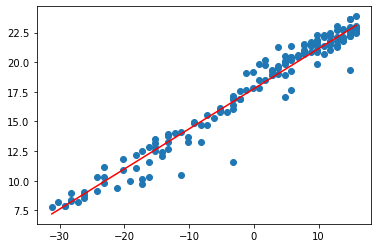

In [56]:
yhat = model.predict(X).flatten()
plt.scatter(X, y)
plt.plot(X, yhat, c='red')

In [57]:
# manual calculation

w, b = model.layers[0].get_weights()

X = X.reshape(-1, 1)

yhat2 = (X.dot(w) + b).flatten()

np.allclose(yhat, yhat2)

True